<a href="https://colab.research.google.com/github/ab-sa/Statistical-Machine-Learning/blob/main/Lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline

Import Credit data

In [2]:
Credit = pd.read_csv('Credit.csv')
print('Dimension of the data: ' + str(Credit.shape))
Credit.head()

Dimension of the data: (400, 12)


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Convert Age to a categorial variale

In [3]:
Credit.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [10]:
Credit['Age_cat'] = pd.cut(Credit['Age'],
                           bins=[0, 30, 40, 56, 70, 100],
                           labels=['(0, 30]', '(30, 40]', '(40, 56]', '(56, 70]', '(70, 100]'])
print(Credit['Age_cat'].value_counts())
Credit.groupby('Age_cat')['Age'].describe()

(40, 56]     115
(56, 70]     100
(70, 100]     94
(30, 40]      59
(0, 30]       32
Name: Age_cat, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Age_cat,,,,,,,,
"(0, 30]",32.0,27.343750,2.308601,23.0,25.0,28.0,29.25,30.0
"(30, 40]",59.0,35.525424,2.812263,31.0,33.0,35.0,38.00,40.0
"(40, 56]",115.0,48.078261,4.450799,41.0,44.0,48.0,51.00,56.0
"(56, 70]",100.0,63.970000,4.186209,57.0,60.0,65.0,67.00,70.0
"(70, 100]",94.0,78.404255,5.067966,71.0,75.0,78.5,81.00,98.0


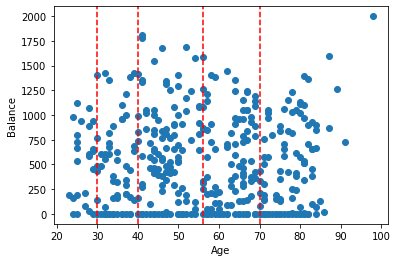

In [16]:
plt.scatter(Credit['Age'], Credit['Balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
for cp in [30, 40, 56, 70]:
  plt.axvline(x=cp, color = 'red', linestyle='--')
plt.show()

Fit a LM on the Age_cat engineered feature

In [12]:
LM_AgeCat = smf.ols(formula = "Balance ~ Age_cat", data = Credit).fit()
print(LM_AgeCat.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.835
Date:                Thu, 30 Dec 2021   Prob (F-statistic):              0.121
Time:                        03:32:06   Log-Likelihood:                -3015.7
No. Observations:                 400   AIC:                             6041.
Df Residuals:                     395   BIC:                             6061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              504.8125 

Visualization

0    504.812500
1    462.864407
2    615.869565
3    473.930000
4    492.819149
dtype: float64


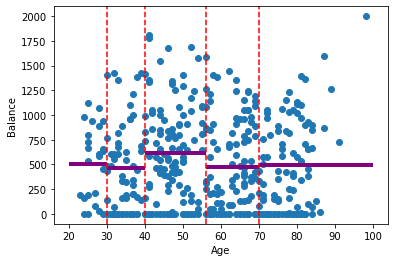

In [28]:
preds = LM_AgeCat.predict(exog = pd.DataFrame(['(0, 30]', '(30, 40]', '(40, 56]', '(56, 70]', '(70, 100]'],
                                      columns = ['Age_cat']))
plt.scatter(Credit['Age'], Credit['Balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
for cp in [30, 40, 56, 70]:
  plt.axvline(x=cp, color = 'red', linestyle='--')
for sp, beg, end in zip(preds, [20, 30, 40, 56, 70], [30, 40, 56, 70, 100]):
  plt.hlines(y=sp, xmin=beg, xmax=end, linewidth=4, color='purple')
plt.show()

Working with two variables:
- Income
- Education

In [31]:
Credit['Income_bin'] = pd.cut(Credit['Income'],
                           bins=[0, np.median(Credit['Income']), np.max(Credit['Income'])],
                           labels=['Low', 'High'])
Credit['Education_bin'] = pd.cut(Credit['Education'],
                           bins=[0, np.median(Credit['Education']), np.max(Credit['Education'])],
                           labels=['Low', 'High'])
print(Credit['Income_bin'].value_counts())
print(Credit['Education_bin'].value_counts())

High    200
Low     200
Name: Income_bin, dtype: int64
Low     233
High    167
Name: Education_bin, dtype: int64


In [32]:
LM_IncEduc = smf.ols(formula = "Balance ~ Income_bin + Education_bin", data = Credit).fit()
print(LM_IncEduc.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     24.74
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           7.47e-11
Time:                        04:00:14   Log-Likelihood:                -2995.9
No. Observations:                 400   AIC:                             5998.
Df Residuals:                     397   BIC:                             6010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               349.97

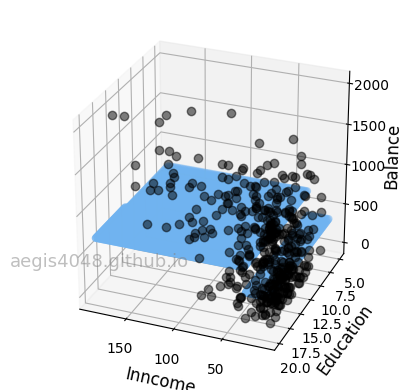

In [36]:
x1 = np.linspace(10, 190, 100)
x1_bin = pd.cut(x1, bins=[0, np.median(Credit['Income']), np.max(Credit['Income'])], labels=['Low', 'High'])
x2 = np.linspace(5, 20, 100)
x2_bin = pd.cut(x2, bins=[0, np.median(Credit['Education']), np.max(Credit['Education'])], labels=['Low', 'High'])

Income, Education = np.meshgrid(x1, x2)
Income_bin, Education_bin = np.meshgrid(x1_bin, x2_bin)
X_3d = np.array([Income.flatten(), Education.flatten()]).T
X_bin_3d = np.array([Income_bin.flatten(), Education_bin.flatten()]).T
X_bin_3d = pd.DataFrame(X_bin_3d, columns = ['Income_bin', 'Education_bin'])
preds_3d = LM_IncEduc.predict(X_bin_3d)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')

ax.plot(Credit['Income'], Credit['Education'], Credit['Balance'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(Income.flatten(), Education.flatten(), preds_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Inncome', fontsize=12)
ax.set_ylabel('Education', fontsize=12)
ax.set_zlabel('Balance', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

ax.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax.transAxes, color='grey', alpha=0.5)

ax.view_init(elev=27, azim=112)

fig.tight_layout()

Model with interaction term

In [37]:
LM_IncEduc_inter = smf.ols(formula = "Balance ~ Income_bin + Education_bin + Income_bin:Education_bin", data = Credit).fit()
print(LM_IncEduc_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     16.62
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           3.45e-10
Time:                        04:17:54   Log-Likelihood:                -2995.6
No. Observations:                 400   AIC:                             5999.
Df Residuals:                     396   BIC:                             6015.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

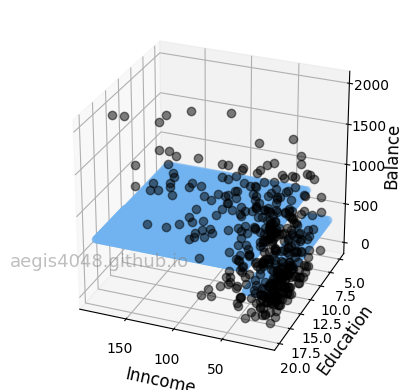

In [38]:
x1 = np.linspace(10, 190, 100)
x1_bin = pd.cut(x1, bins=[0, np.median(Credit['Income']), np.max(Credit['Income'])], labels=['Low', 'High'])
x2 = np.linspace(5, 20, 100)
x2_bin = pd.cut(x2, bins=[0, np.median(Credit['Education']), np.max(Credit['Education'])], labels=['Low', 'High'])

Income, Education = np.meshgrid(x1, x2)
Income_bin, Education_bin = np.meshgrid(x1_bin, x2_bin)
X_3d = np.array([Income.flatten(), Education.flatten()]).T
X_bin_3d = np.array([Income_bin.flatten(), Education_bin.flatten()]).T
X_bin_3d = pd.DataFrame(X_bin_3d, columns = ['Income_bin', 'Education_bin'])
preds_3d = LM_IncEduc_inter.predict(X_bin_3d)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')

ax.plot(Credit['Income'], Credit['Education'], Credit['Balance'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(Income.flatten(), Education.flatten(), preds_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Inncome', fontsize=12)
ax.set_ylabel('Education', fontsize=12)
ax.set_zlabel('Balance', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

ax.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax.transAxes, color='grey', alpha=0.5)

ax.view_init(elev=27, azim=112)

fig.tight_layout()